Librerias

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
import seaborn as sns
import sklearn
import imblearn

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

Abriendo la base de datos
y realizando una exploracion de la misma

In [55]:
drive.mount("/content/drive")
datosCrudos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/diabetes_prediction_dataset.csv')
#Mostrando algunos elementos de la base
datosCrudos

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [56]:
#Mostrando de forma general
datosCrudos.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [57]:
#Visualizando tipos de datos para cada columna
datosCrudos.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [58]:
#Visualizando si es que existen valores nulos
print(datosCrudos.isna().sum())
#Visualizando datos duplicados
print("Cantidad de elementos duplicados", datosCrudos.duplicated().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
Cantidad de elementos duplicados 3854


In [59]:
#Mostrando las columnas duplicadas
datosDuplicados = datosCrudos[datosCrudos.duplicated()]
datosDuplicados

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


<Axes: >

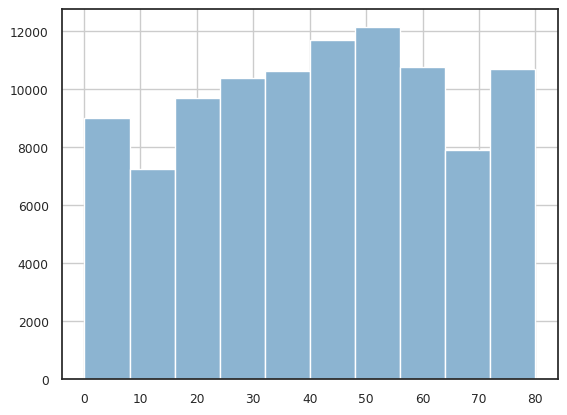

In [60]:
#historgrama de la edad
datosCrudos['age'].hist()

<Axes: >

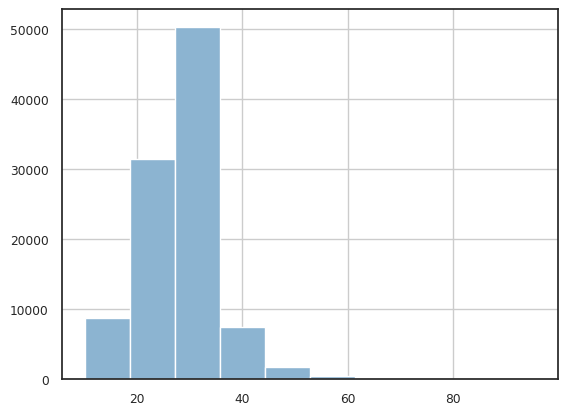

In [61]:
#historgrama de la bmi
datosCrudos['bmi'].hist()

<Axes: >

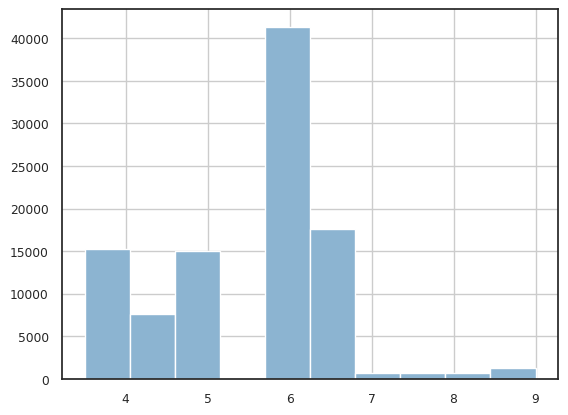

In [62]:
#historgrama de la hba1c
datosCrudos['HbA1c_level'].hist()

<Axes: >

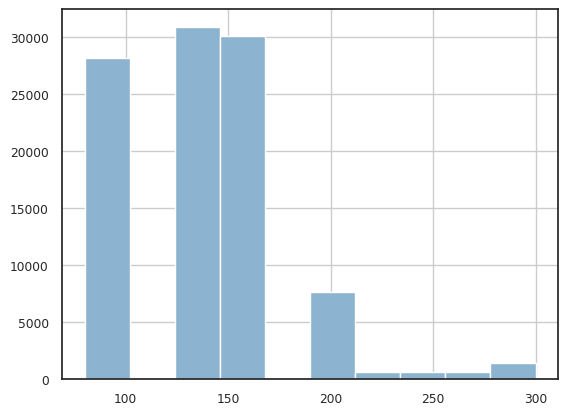

In [63]:
#historgrama de blood_glucose_level
datosCrudos['blood_glucose_level'].hist()

<Axes: xlabel='smoking_history', ylabel='count'>

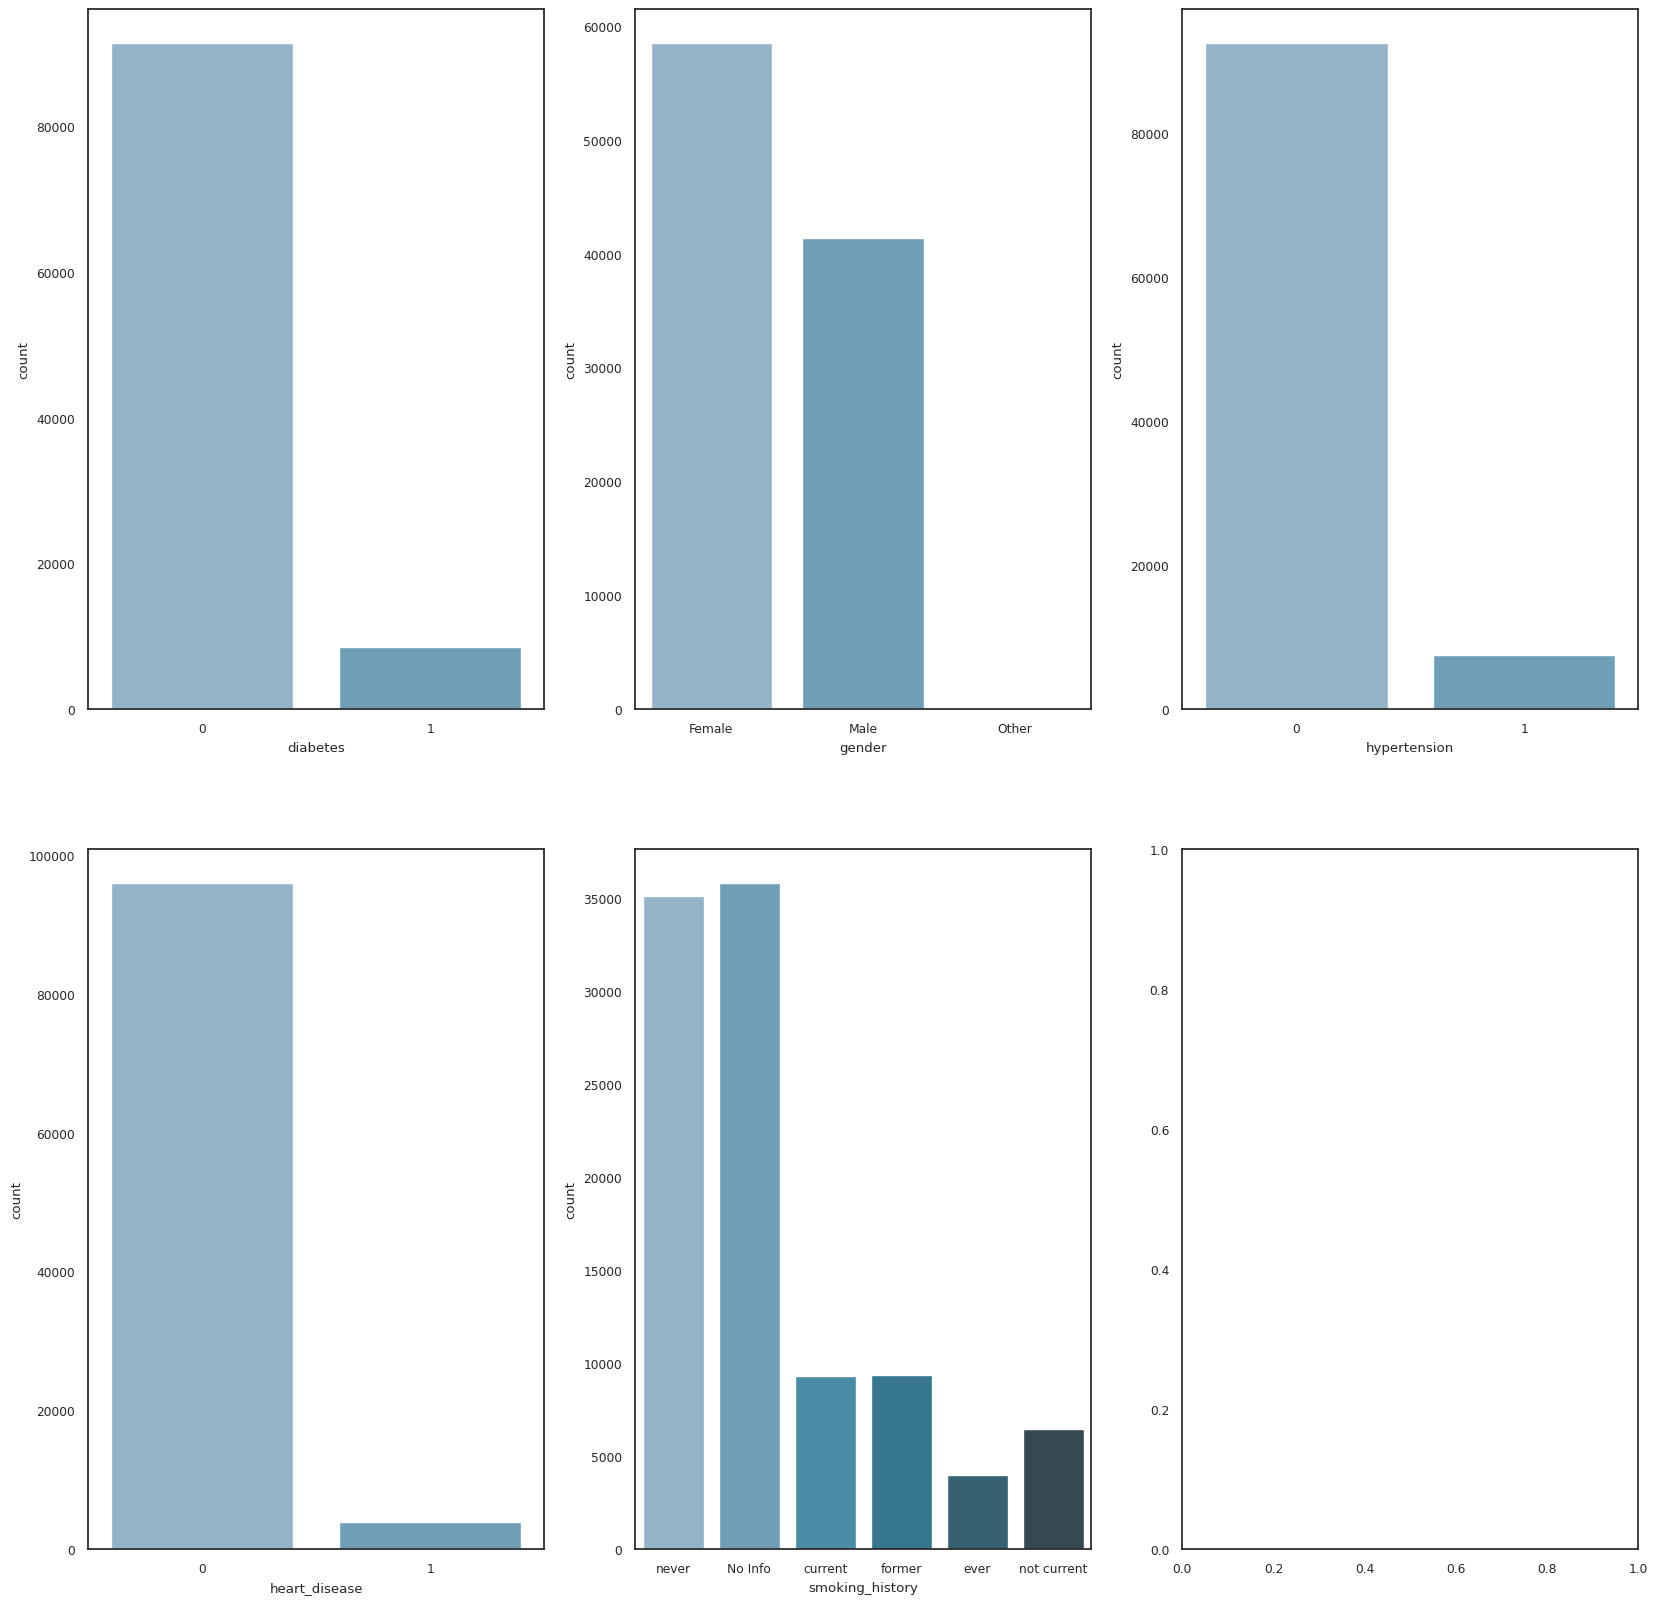

In [64]:
#Mostrando la distribucion de los valores categoricos
f, axes = plt.subplots(2,3, figsize= (20,20))
sns.countplot(x='diabetes', data=datosCrudos,ax =axes[0,0])
sns.countplot(x='gender', data=datosCrudos,ax =axes[0,1])
sns.countplot(x='hypertension',data=datosCrudos,ax =axes[0,2])
sns.countplot(x='heart_disease',data=datosCrudos,ax =axes[1,0])
sns.countplot(x='smoking_history',data=datosCrudos,ax =axes[1,1])

Text(0.5, 1.0, 'edad')

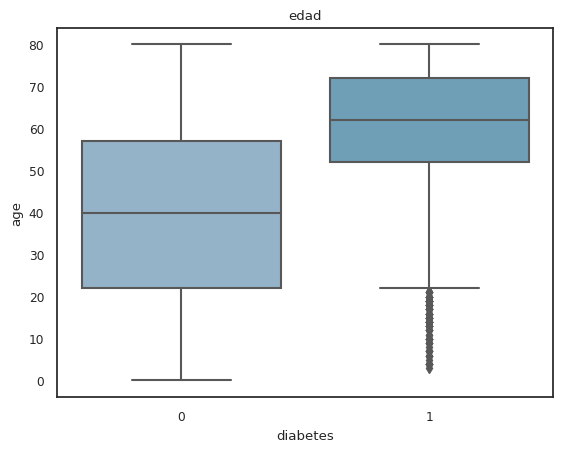

In [65]:
plt.figure(1)
sns.boxplot(x='diabetes', y='age', data=datosCrudos)
plt.title('edad')


<Axes: xlabel='diabetes', ylabel='count'>

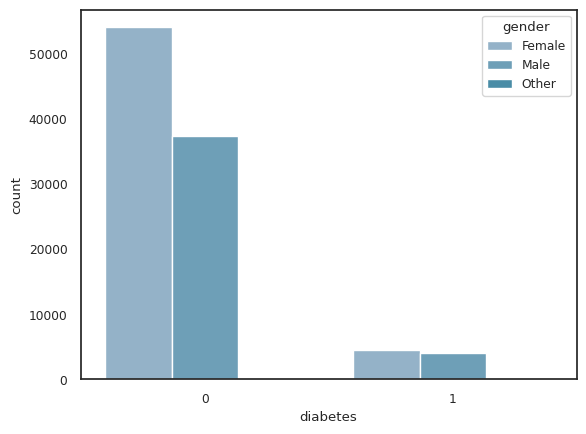

In [66]:
sns.countplot(data=datosCrudos,x='diabetes',hue='gender')

<Axes: xlabel='smoking_history', ylabel='count'>

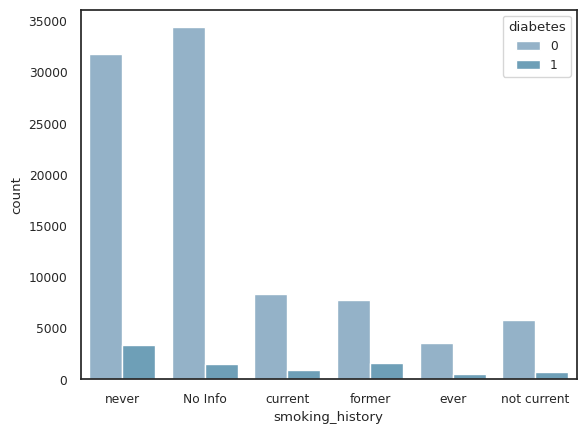

In [67]:
sns.countplot(data=datosCrudos,x='smoking_history',hue='diabetes')

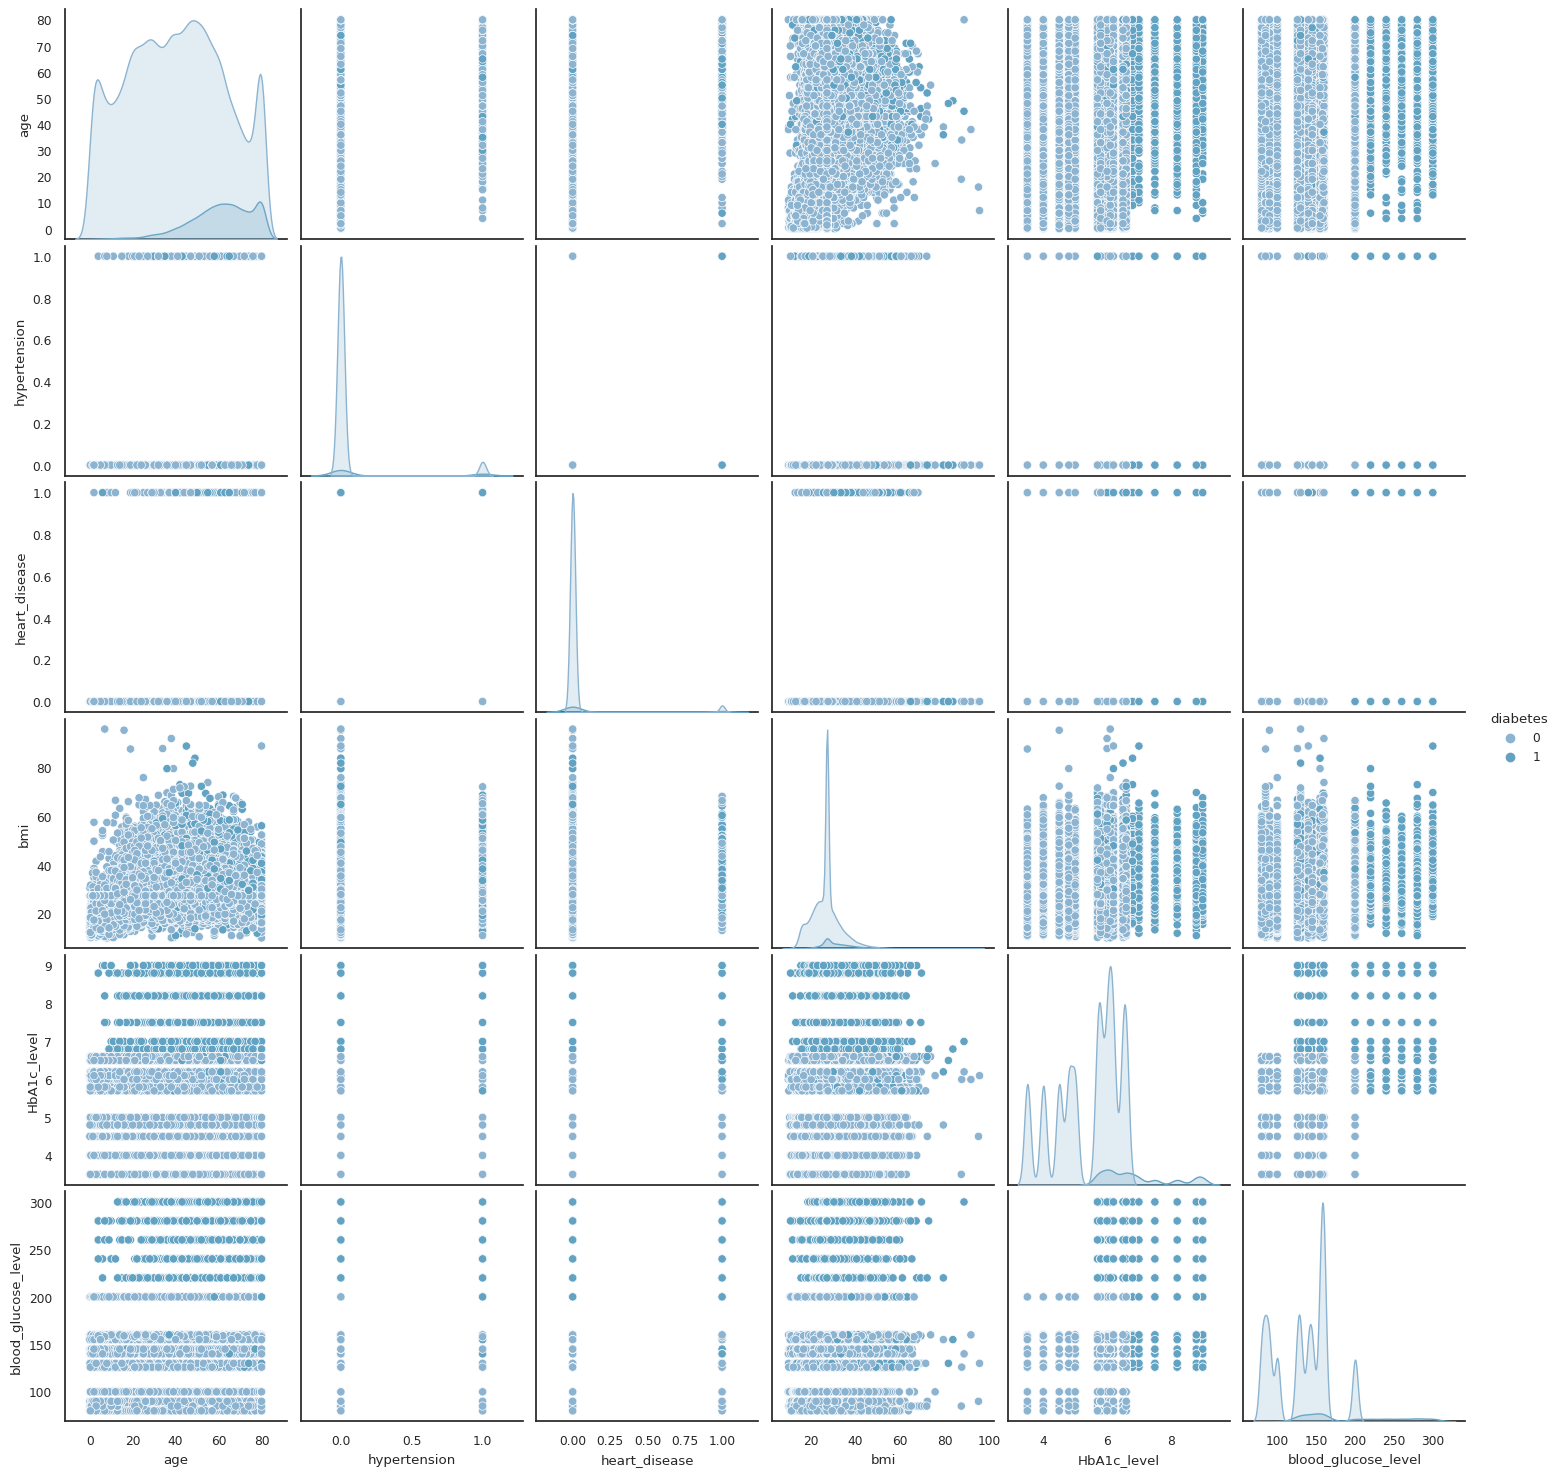

In [68]:
sns.pairplot(data=datosCrudos,hue='diabetes')

# Realizando la limpieza
Como se puede visualizar casi no hay datos nulos, por lo cual no es necesario realizar una limpieza de datos nulos, pero se encontro elementos duplicados asi que se obtara por desechar dichos datos, y en cuanto al genero como solo se ve desde un punto de vista bilogico (no ideologico) se optara por desecharlos.
Además pues se pasar los datos "Etiqueta" a un valor numerico, para su buen procesamiento sin problemas (esto se aplicara en el genero y en el historial de fumador)

In [69]:
#Eliminando duplicados
datosCrudos=datosCrudos.drop_duplicates()
#Eliminando los datos que tengan el valor de otro en genero
datos=datosCrudos[datosCrudos['gender'] != 'Other']
#Mostrando los datos limpios
datos

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [70]:
def combinar_eliminar(dataframe, columna):
  nuevoDataFrame= pd.get_dummies(dataframe[columna], prefix=columna)
  dataframe=dataframe.drop(columna,axis=1)
  dataframe = pd.concat([dataframe,nuevoDataFrame],axis=1)
  return dataframe

In [71]:
print("Valores del genero",datos['gender'].unique())
#Cobirtiendo a genero de categoria a un valor manejable
datos=combinar_eliminar(datos,'gender')
datos

Valores del genero ['Female' 'Male']


,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male
0,80.0,0,1,never,25.19,6.6,140,0,1,0
1,54.0,0,0,No Info,27.32,6.6,80,0,1,0
2,28.0,0,0,never,27.32,5.7,158,0,0,1
3,36.0,0,0,current,23.45,5.0,155,0,1,0
4,76.0,1,1,current,20.14,4.8,155,0,0,1
...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,No Info,24.60,4.8,145,0,1,0
99996,2.0,0,0,No Info,17.37,6.5,100,0,1,0
99997,66.0,0,0,former,27.83,5.7,155,0,0,1
99998,24.0,0,0,never,35.42,4.0,100,0,1,0


Ahora respecto a el smoking hisotry investigando las palabras usadas se puede clasificar en un numero menor de grupos  no fuma, solia fumar, fuma y no info, en el caso de no info es dificil de tratar dado que no podemos suponer que todos los registros con no info nunca hayan fumado y tanpoco que estos puedieran haber fumado aunque sea una vez



In [72]:
def cambaiando_smokingHistory(valor):
  if valor == "never":
    return "no_fuma"
  elif valor == 'current':
    return "fuma"
  elif valor in ['former', 'ever', 'not current']:
    return 'solia_fumar'
  else:
    return 'sin_informacion'

In [73]:
datos['smoking_history']=datos['smoking_history'].apply(cambaiando_smokingHistory)
datos

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male
0,80.0,0,1,no_fuma,25.19,6.6,140,0,1,0
1,54.0,0,0,sin_informacion,27.32,6.6,80,0,1,0
2,28.0,0,0,no_fuma,27.32,5.7,158,0,0,1
3,36.0,0,0,fuma,23.45,5.0,155,0,1,0
4,76.0,1,1,fuma,20.14,4.8,155,0,0,1
...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,sin_informacion,24.60,4.8,145,0,1,0
99996,2.0,0,0,sin_informacion,17.37,6.5,100,0,1,0
99997,66.0,0,0,solia_fumar,27.83,5.7,155,0,0,1
99998,24.0,0,0,no_fuma,35.42,4.0,100,0,1,0


Text(0.5, 1.0, 'Historial de fumador')

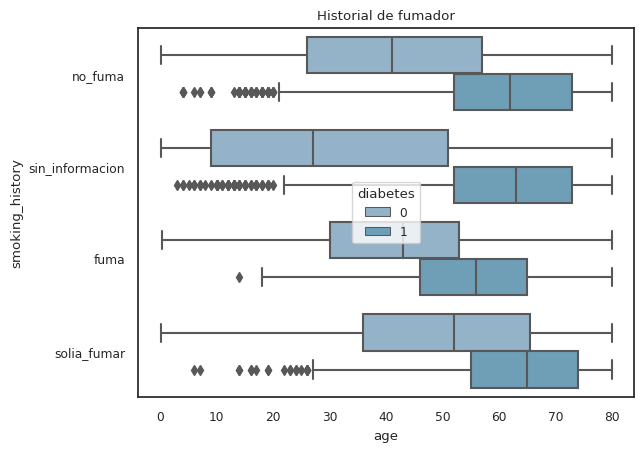

In [74]:
#visualiando los datos de diabetes, segun la smoking data history
plt.figure(1)
sns.boxplot(x='age',y='smoking_history', hue='diabetes', data=datos, )
plt.title('Historial de fumador')

In [75]:
print("Valores del hisotrial de fumadores",datos['smoking_history'].unique())
#Cobirtiendo a genero de categoria a un valor manejable
datos=combinar_eliminar(datos,'smoking_history')
datos

Valores del hisotrial de fumadores ['no_fuma' 'sin_informacion' 'fuma' 'solia_fumar']


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_fuma,smoking_history_no_fuma,smoking_history_sin_informacion,smoking_history_solia_fumar
0,80.0,0,1,25.19,6.6,140,0,1,0,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,1,0,0
3,36.0,0,0,23.45,5.0,155,0,1,0,1,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0,1,0,0,0,1,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,0,1,0
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,0,0,1
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,1,0,0


Ahora es momento de realizar la correlacion de las variables para ver que es lo que estas pueden decirnos respecto a los datos.

Text(0.5, 1.0, 'Correlacion de las variables')

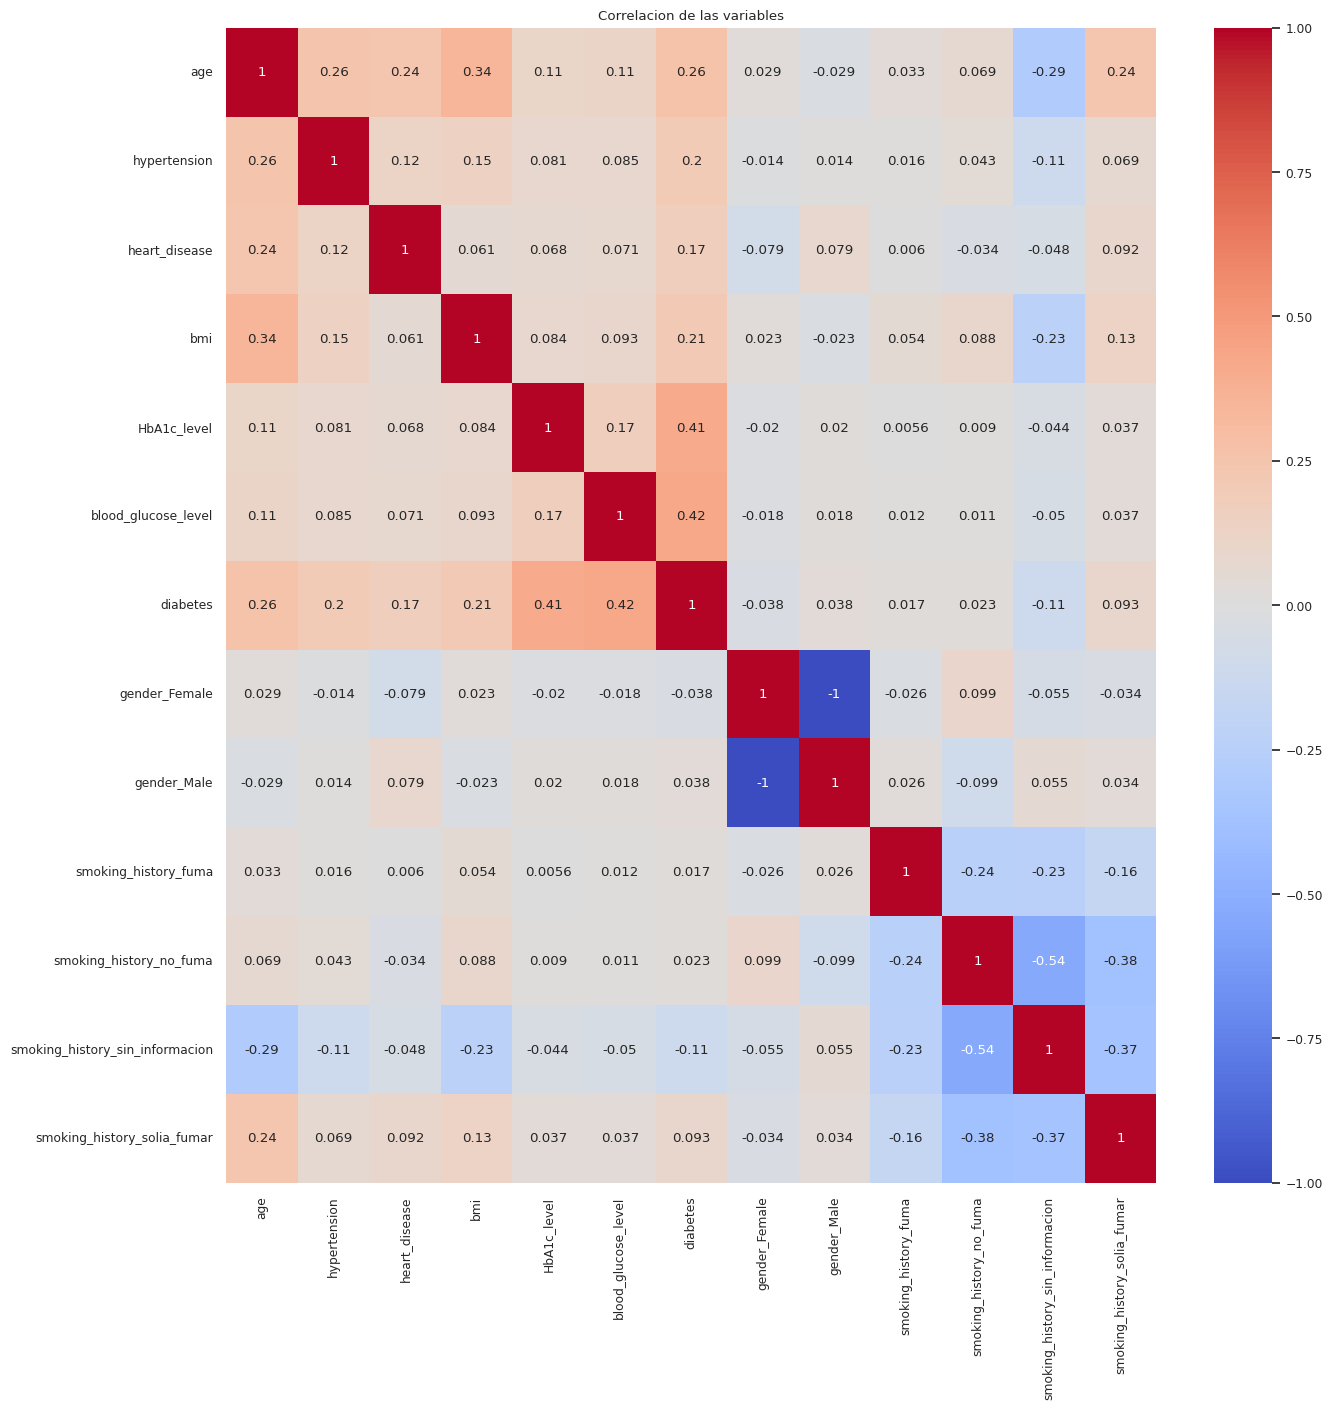

In [76]:
#Realizando la correlacion
plt.figure(figsize=(15,15))
sns.heatmap(datos.corr(),cmap="coolwarm",annot=True)
plt.title('Correlacion de las variables')

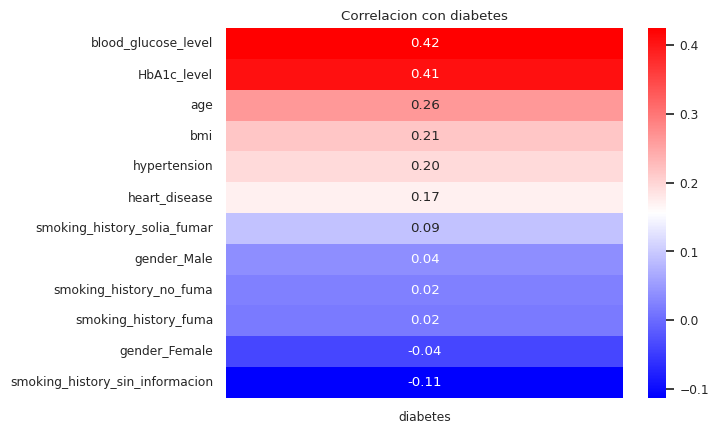

In [77]:
corr = datos.corr()
objetivo_corr = corr['diabetes'].drop('diabetes')

# Acomoder los valores en orden decendente
objetivo_corrA = objetivo_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(objetivo_corrA.to_frame(), cmap="bwr", annot=True, fmt='.2f')
plt.title('Correlacion con diabetes')
plt.show()

# Antes de solucionar los problemas
Antes de visualizar como es que se solucionara el probelma del desbalanceo de las clases veremos como, es que esto afecta a los modelos planteados.

In [78]:
#Realizando la estandiracion de los datos
X= datos.drop('diabetes',axis=1)
Y=datos['diabetes']
#Colum transformer
ct=ColumnTransformer(
    [("numeros", StandardScaler(), ['age', 'bmi', 'HbA1c_level','blood_glucose_level'] )],
    remainder='passthrough'
)
X=ct.fit_transform(X)
#Ahora diviremos los datos
X_entrenaP, X_pruebaP, Y_entrenaP, Y_pruebaP = train_test_split(X,Y,test_size=0.2, random_state=42)

Ahora pondremos enmarcha los modelos sin realizar el smote

In [79]:
#Primeramente mostraremos las redes neuronales
mlp=MLPClassifier(hidden_layer_sizes=(300,100),learning_rate_init=0.001,max_iter=400)
mlp.fit(X_entrenaP,Y_entrenaP);
predicionesRed1=mlp.predict(X_pruebaP)
print("Matris de confusion: \n",confusion_matrix(Y_pruebaP,predicionesRed1))
print("Reporte de clasificacion: \n:",classification_report(Y_pruebaP,predicionesRed1))

Matris de confusion: 
 [[17311   214]
 [  522  1179]]
Reporte de clasificacion: 
:               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17525
           1       0.85      0.69      0.76      1701

    accuracy                           0.96     19226
   macro avg       0.91      0.84      0.87     19226
weighted avg       0.96      0.96      0.96     19226



In [80]:
#Ahora es el momento para randomforest
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_entrenaP,Y_entrenaP)
predicionesRf1=rf.predict(X_pruebaP)
print("Matris de confusion: \n",confusion_matrix(Y_pruebaP,predicionesRf1))
print("Reporte de clasificacion: \n:",classification_report(Y_pruebaP,predicionesRf1))

Matris de confusion: 
 [[17445    80]
 [  564  1137]]
Reporte de clasificacion: 
:               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       0.93      0.67      0.78      1701

    accuracy                           0.97     19226
   macro avg       0.95      0.83      0.88     19226
weighted avg       0.97      0.97      0.96     19226



In [83]:
#Funcion para graficar los heatmaps de las matrices de confucion
def heatmaps_matrices(matriz1, matriz2, op1):
  cmap1=""
  cmap2=""
  title=""
  if op1 == 1:
    cmap1="Spectral"
    cmap2="icefire"
    title="Sin smote"
  else:
    cmap1="coolwarm"
    cmap2="crest"
    title="Con smote"

  nombres = ['Negativos Verdaderos','Falsos Positivos','Falso Negativo','Positivos Verdaderos']
  conteo1 = ['{0:0.0f}'.format(value) for value in matriz1.flatten()]
  conteo2 = ['{0:0.0f}'.format(value) for value in matriz2.flatten()]

  porcentajes1 = ['{0:.2%}'.format(value) for value in matriz1.flatten()/np.sum(matriz1)]
  porcentajes2 = ['{0:.2%}'.format(value) for value in matriz2.flatten()/np.sum(matriz2)]

  labels1 = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,conteo1,porcentajes1)]
  labels1 = np.asarray(labels1).reshape(2,2)

  labels2 = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,conteo2,porcentajes2)]
  labels2 = np.asarray(labels2).reshape(2,2)

  f, axes = plt.subplots(2,1, figsize= (10,10))
  sns.heatmap(A,annot=labels1,fmt='',ax=axes[0], cmap=cmap1).set(title=title) #Redes neuronales
  sns.heatmap(B,annot=labels2,fmt='',ax=axes[1], cmap=cmap2).set(title="Matriz de confusion random forest") #Random forest

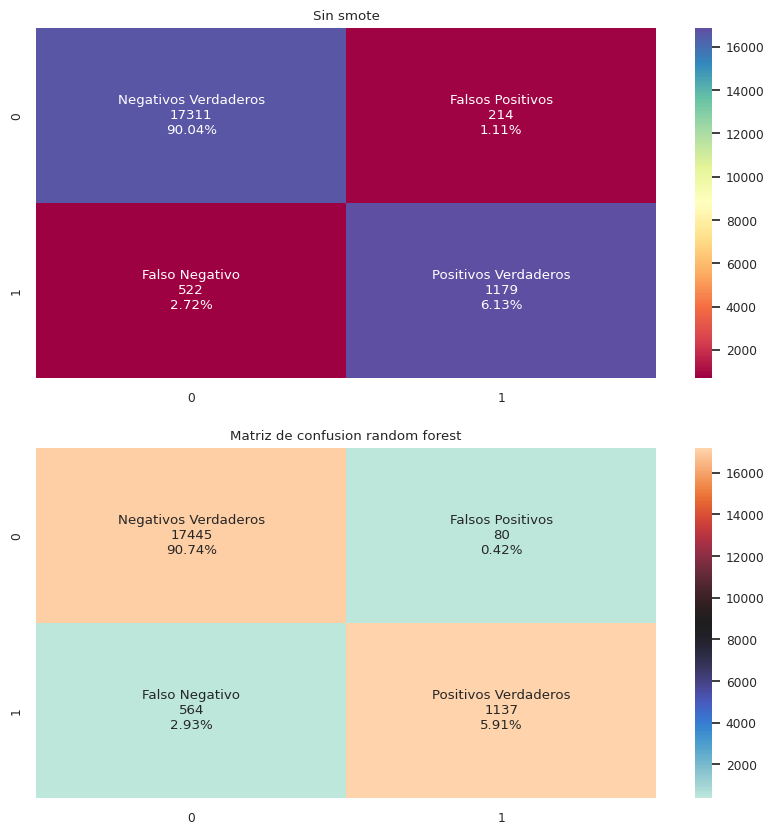

In [84]:
#Matrices de confucion
A1=confusion_matrix(Y_pruebaP,predicionesRed1)
B1=confusion_matrix(Y_pruebaP,predicionesRf1)
heatmaps_matrices(A1,B1,1)

# Solucionando el problema de distribucion de clases no valanciadas
Bueno como se pudo visualizar en una grafica anterior existe un gran numero de elementos que la clase no diabetes lo cual hace que nuestro dataset este desvalanciado, de las tecnicas investigadas para solucionar este probelma considero que la mejor es la creación de nuevos datos en ves de eliminar los datos reales de no diabetes, asi que se usara la tecnica de Overslaping siendo más espesificos la de SMOTE que parece ser la más popular.

In [85]:
#Primeramente es necesario mencionar que sedebe aplicar la normalizacion de los datos dado que la liberaria necestia esto para
#poder funcionar correctametne
sm = SMOTE(random_state=42)
X_sm,Y_sm = sm.fit_resample(X,Y)
print("forma antes del smote: ",X.shape)
print("forma despues del smote: ",X_sm.shape)
print("Visualizando el valance de los casos: ")
Y_sm.value_counts(normalize=True)*100

forma antes del smote:  (96128, 12)
forma despues del smote:  (175292, 12)
Visualizando el valance de los casos: 


0    50.0
1    50.0
Name: diabetes, dtype: float64

Ahora se tiene pensado usar dos modelos para la precicion redes neuronales y randomforest.
Antes de esos determinaremos cuales son los mejores valores para esots modelos en base a los datos que se tienen.

In [86]:
parametros_RF = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

parametros_RN ={
    'hidden_layer_sizes': [100, 200, 300],
    'learning_rate_init':[0.001, 0.1, 0.2]
}

#Dividiendo los datos que tienen smote
X_entrena, X_prueba, Y_entrena, Y_prueba = train_test_split(X_sm,Y_sm,test_size=0.2, random_state=42)

In [87]:
#Primeramente mostraremos las redes neuronales
mlp=MLPClassifier(hidden_layer_sizes=(300,100),learning_rate_init=0.001,max_iter=400)
mlp.fit(X_entrena,Y_entrena);
predicionesRed=mlp.predict(X_prueba)
print("Matris de confusion: \n",confusion_matrix(Y_prueba,predicionesRed))
print("Reporte de clasificacion: \n:",classification_report(Y_prueba,predicionesRed))

Matris de confusion: 
 [[16329  1136]
 [  416 17178]]
Reporte de clasificacion: 
:               precision    recall  f1-score   support

           0       0.98      0.93      0.95     17465
           1       0.94      0.98      0.96     17594

    accuracy                           0.96     35059
   macro avg       0.96      0.96      0.96     35059
weighted avg       0.96      0.96      0.96     35059



In [88]:
#Ahora es el momento para randomforest
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_entrena,Y_entrena)
predicionesRf=rf.predict(X_prueba)
print("Matris de confusion: \n",confusion_matrix(Y_prueba,predicionesRf))
print("Reporte de clasificacion: \n:",classification_report(Y_prueba,predicionesRf))

Matris de confusion: 
 [[17023   442]
 [  402 17192]]
Reporte de clasificacion: 
:               precision    recall  f1-score   support

           0       0.98      0.97      0.98     17465
           1       0.97      0.98      0.98     17594

    accuracy                           0.98     35059
   macro avg       0.98      0.98      0.98     35059
weighted avg       0.98      0.98      0.98     35059



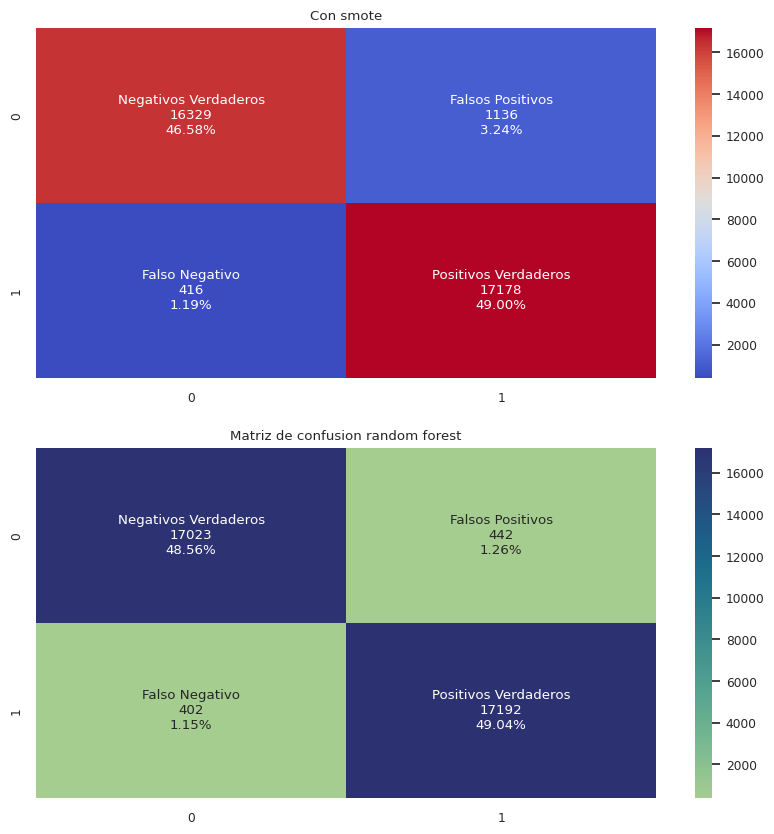

In [89]:
#Matrices de funcion
A=confusion_matrix(Y_prueba,predicionesRed)
B=confusion_matrix(Y_prueba,predicionesRf)
#Los heatmaps de las matrices de confucion
heatmaps_matrices(A,B,2)

In [90]:
#Ahora se creara la coparacion de los modelos
def AnalizarMatConf(MatConfusion):
  data1 =[]
  precicionGlobal= (MatConfusion[0][0] + MatConfusion[1][1])/MatConfusion.sum()
  errorGlobal= 1- precicionGlobal
  pNegativa = (MatConfusion[0][0]/MatConfusion[0].sum())
  pPositiva =(MatConfusion[1][1]/MatConfusion[1].sum())
  falsosP = (MatConfusion[0][1]/MatConfusion[0].sum())
  falsosN = (MatConfusion[1][0]/MatConfusion[1].sum())
  aserPositiva =(MatConfusion[1][1]/MatConfusion[:,1].sum())
  aserNegativa =(MatConfusion[0][0]/ MatConfusion[:,0].sum())
  data1.append(precicionGlobal)
  data1.append(errorGlobal)
  data1.append(pNegativa)
  data1.append(pPositiva)
  data1.append(falsosP)
  data1.append(falsosN)
  data1.append(aserPositiva)
  data1.append(aserNegativa)
  return data1

def dataFrameUWU(datos):
  data= pd.DataFrame(datos,columns=['Precision_Global','Error_Global','Pres.Negativa','Pres.Positiva','Falsos.Positivos','Falsos.Negativos','Asert.Positiva','Asert.Negativa'],
                     index=['RN_SINS','RF_SINS','RN_CONS','RF_CONS'])
  return data

datos=[]
datos.append(AnalizarMatConf(A1))
datos.append(AnalizarMatConf(B1))
datos.append(AnalizarMatConf(A))
datos.append(AnalizarMatConf(B))
dUWU= dataFrameUWU(datos)
print("**************************")
print("Analisis obtenido con la matriz de confusion")
dUWU

**************************
Analisis obtenido con la matriz de confusion


,Precision_Global,Error_Global,Pres.Negativa,Pres.Positiva,Falsos.Positivos,Falsos.Negativos,Asert.Positiva,Asert.Negativa
RN_SINS,0.961719,0.038281,0.987789,0.693122,0.012211,0.306878,0.846375,0.970728
RF_SINS,0.966504,0.033496,0.995435,0.668430,0.004565,0.331570,0.934265,0.968682
RN_CONS,0.955732,0.044268,0.934956,0.976356,0.065044,0.023644,0.937971,0.975157
RF_CONS,0.975926,0.024074,0.974692,0.977151,0.025308,0.022849,0.974935,0.976930


Prediciendo con el modelo entrenado con los datos smote, para predecir los datos reales (antes que crearan estos datos sinteticos)

In [92]:
predicionesRed=mlp.predict(X_pruebaP)
print("Matris de confusion: \n",confusion_matrix(Y_pruebaP,predicionesRed))
print("Reporte de clasificacion: \n:",classification_report(Y_pruebaP,predicionesRed))

Matris de confusion: 
 [[16736   789]
 [   45  1656]]
Reporte de clasificacion: 
:               precision    recall  f1-score   support

           0       1.00      0.95      0.98     17525
           1       0.68      0.97      0.80      1701

    accuracy                           0.96     19226
   macro avg       0.84      0.96      0.89     19226
weighted avg       0.97      0.96      0.96     19226



In [93]:
predicionesRf=rf.predict(X_pruebaP)
print("Matris de confusion: \n",confusion_matrix(Y_pruebaP,predicionesRf))
print("Reporte de clasificacion: \n:",classification_report(Y_pruebaP,predicionesRf))

Matris de confusion: 
 [[17420   105]
 [   80  1621]]
Reporte de clasificacion: 
:               precision    recall  f1-score   support

           0       1.00      0.99      0.99     17525
           1       0.94      0.95      0.95      1701

    accuracy                           0.99     19226
   macro avg       0.97      0.97      0.97     19226
weighted avg       0.99      0.99      0.99     19226



Nota lo que biene a continuacion no es recomendable correrlo debido al alto tiempo de compilación, estamos tratando con tiempos de una hora o más asi que es recomendable no correrlo.

In [28]:
#Para el randomforest
gs_NN= GridSearchCV(MLPClassifier(),parametros_RN,cv=5)
#Entrenamiento del modelo
gs_NN.fit(X_entrena, Y_entrena)
#Mostrando los mejores parametros
print("Los mejores parametros: ", gs_NN.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Los mejores parametros:  {'hidden_layer_sizes': 300, 'learning_rate_init': 0.001}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#Para el randomforest
gs_RandomF= GridSearchCV(RandomForestClassifier(),parametros_RF,cv=5)
#Entrenamiento del modelo
gs_RandomF.fit(X_entrena, Y_entrena)
#Mostrando los mejores parametros
print("Los mejores parametros: ", gs_RandomF.best_params_)

Los mejores parametros:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
